##Naive Bayes

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Obtém o conjunto de dados das 20 newsgroups, removendo cabeçalhos, rodapés e citações
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

In [ ]:
newsgroups

In [3]:
# Obtém o conjunto de dados das 20 newsgroups, removendo cabeçalhos, rodapés e citações
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Divide o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.25, random_state=42)

# Inicializa o vetorizador TF-IDF com parâmetros específicos
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Transforma os conjuntos de treinamento e teste em matrizes de recursos TF-IDF
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Inicializa e treina um classificador Naive Bayes Multinomial
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, y_train)

# Realiza previsões no conjunto de teste
predictions = naive_bayes_classifier.predict(X_test_tfidf)

# Avalia o desempenho do classificador usando a precisão e o relatório de classificação
accuracy = metrics.accuracy_score(y_test, predictions)
print(f"Acurácia: {accuracy:.2f}")

print(metrics.classification_report(y_test, predictions, target_names=newsgroups.target_names))

Acurácia: 0.68
                          precision    recall  f1-score   support

             alt.atheism       0.63      0.43      0.51       198
           comp.graphics       0.58      0.64      0.61       245
 comp.os.ms-windows.misc       0.62      0.65      0.64       242
comp.sys.ibm.pc.hardware       0.56      0.68      0.62       238
   comp.sys.mac.hardware       0.74      0.60      0.67       250
          comp.windows.x       0.78      0.78      0.78       260
            misc.forsale       0.73      0.67      0.70       241
               rec.autos       0.71      0.70      0.71       244
         rec.motorcycles       0.43      0.75      0.55       219
      rec.sport.baseball       0.85      0.78      0.81       261
        rec.sport.hockey       0.88      0.89      0.88       245
               sci.crypt       0.78      0.74      0.76       251
         sci.electronics       0.69      0.58      0.63       249
                 sci.med       0.82      0.80      0.81     

## MLP

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Carrega o conjunto de dados MNIST e divide entre conjuntos de treinamento e teste
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normaliza os valores dos pixels para o intervalo [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Redimensiona as imagens para o formato unidimensional (28x28 pixels)
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Converte os rótulos para a forma one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Inicializa um modelo sequencial
model = models.Sequential()

# Adiciona uma camada densa de 128 unidades com ativação ReLU, e especifica a entrada
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))

# Adiciona a camada de saída com 10 unidades (para 10 classes) e ativação softmax
model.add(layers.Dense(10, activation='softmax'))

# Compila o modelo especificando otimizador, função de perda e métricas
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treina o modelo nos dados de treinamento, com validação em 20% dos dados
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Avalia o modelo nos dados de teste e imprime a precisão do teste
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Acurácia no teste: {test_acc}')

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
750/750 [==============================] - 6s 7ms/step - loss: 0.3308 - accuracy: 0.9061 - val_loss: 0.1897 - val_accuracy: 0.9468
Epoch 2/5
750/750 [==============================] - 4s 5ms/step - loss: 0.1513 - accuracy: 0.9558 - val_loss: 0.1330 - val_accuracy: 0.9613
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 0.1067 - accuracy: 0.9689 - val_loss: 0.1141 - val_accuracy: 0.9672
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0818 - accuracy: 0.9767 - val_loss: 0.0972 - val_accuracy: 0.9714
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0878 - accuracy: 0.9733
Acurácia no teste: 0.9732999801635742


1/1 [==============================] - 0s 94ms/step


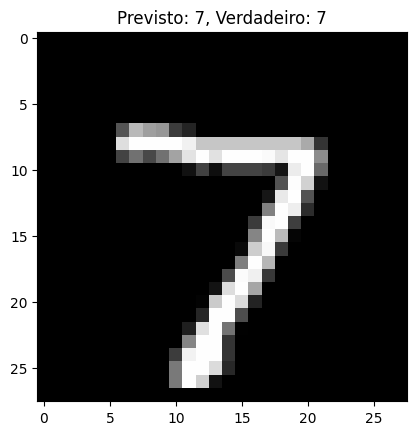

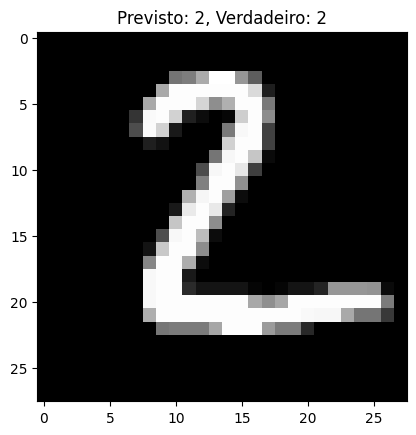

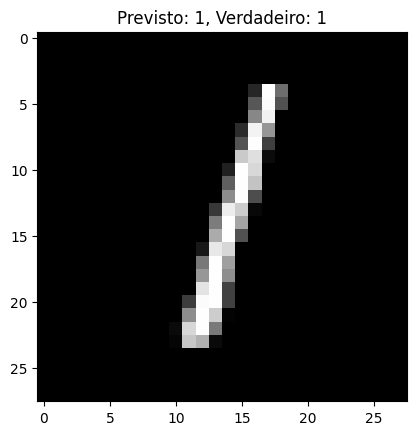

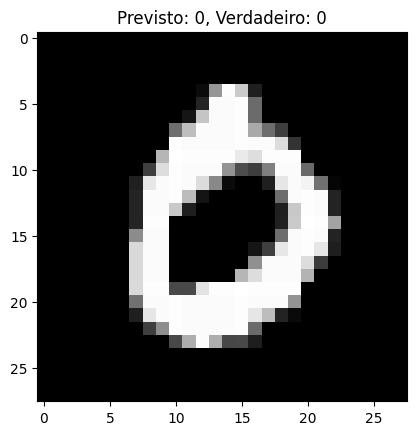

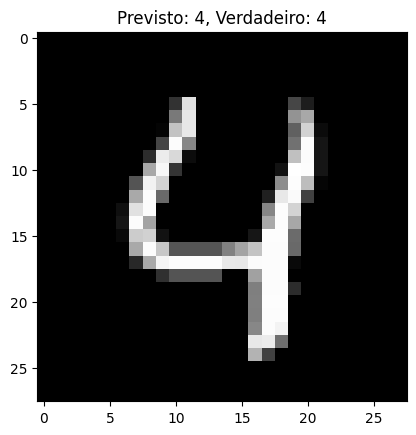

In [5]:
# Faz previsões usando o modelo nos primeiros 5 exemplos dos dados de teste
predictions = model.predict(test_images[:5])

# Exibe as imagens e as previsões correspondentes
for i in range(5):
    # Mostra a imagem original em escala de cinza
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')

    # Adiciona título com a previsão do modelo e a verdadeira classe
    plt.title(f"Previsto: {tf.argmax(predictions[i]).numpy()}, Verdadeiro: {tf.argmax(test_labels[i]).numpy()}")

    # Exibe a imagem com o título
    plt.show()

## Comitê de Classificadores

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define a URL para o conjunto de dados de qualidade de vinho branco
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Lê os dados do CSV e armazena em um DataFrame usando pandas
wine_data = pd.read_csv(url, sep=';')

# Divide os dados em features (X) e rótulos (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializa classificadores individuais
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=7)
logistic_classifier = LogisticRegression(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)

# Inicializa um classificador de conjunto (Voting Classifier) usando votação suave
ensemble_classifier = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('knn', knn_classifier),
    ('logistic', logistic_classifier),
    ('gb', gb_classifier)
], voting='soft')

# Treina o classificador de conjunto nos dados de treinamento
ensemble_classifier.fit(X_train, y_train)

# Faz previsões usando o classificador de conjunto nos dados de teste
ensemble_predictions = ensemble_classifier.predict(X_test)

# Calcula e imprime a precisão do classificador de conjunto
accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Acurácia do Ensemble Classifier: {accuracy:.2f}\n")

# Imprime o relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, ensemble_predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia do Ensemble Classifier: 0.62

Relatório de Classificação:
              precision    recall  f1-score   support

           3       0.50      0.20      0.29         5
           4       0.50      0.08      0.14        25
           5       0.65      0.59      0.62       291
           6       0.58      0.82      0.68       432
           7       0.80      0.38      0.51       192
           8       0.89      0.23      0.36        35

    accuracy                           0.62       980
   macro avg       0.65      0.38      0.43       980
weighted avg       0.65      0.62      0.60       980



In [7]:
# Treina os classificadores individuais nos dados de treinamento
rf_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
logistic_classifier.fit(X_train, y_train)
gb_classifier.fit(X_train, y_train)

# Faz previsões usando os classificadores individuais nos dados de teste
rf_predictions = rf_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)
logistic_predictions = logistic_classifier.predict(X_test)
gb_predictions = gb_classifier.predict(X_test)

# Faz previsões usando o classificador de conjunto nos dados de teste
ensemble_predictions = ensemble_classifier.predict(X_test)

# Calcula e imprime a precisão de cada classificador individual
print("Acurácia do Random Forest:", accuracy_score(y_test, rf_predictions))
print("Acurácia do k-NN:", accuracy_score(y_test, knn_predictions))
print("Acurácia da Regressão Logística:", accuracy_score(y_test, logistic_predictions))
print("Acurácia do Gradient Boosting:", accuracy_score(y_test, gb_predictions))

# Calcula e imprime a precisão do classificador de conjunto
print("\nAcurácia do Ensemble Classifier:", accuracy_score(y_test, ensemble_predictions))

# Imprime o relatório de classificação para cada classificador individual
print("\nRelatório de Classificação para o Random Forest:")
print(classification_report(y_test, rf_predictions))

print("\nRelatório de Classificação para o k-NN:")
print(classification_report(y_test, knn_predictions))

print("\nRelatório de Classificação para a Regressão Logística:")
print(classification_report(y_test, logistic_predictions))

print("\nRelatório de Classificação para o Gradient Boosting:")
print(classification_report(y_test, gb_predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia do Random Forest: 0.689795918367347
Acurácia do k-NN: 0.45510204081632655
Acurácia da Regressão Logística: 0.45918367346938777
Acurácia do Gradient Boosting: 0.5744897959183674

Acurácia do Ensemble Classifier: 0.6234693877551021

Relatório de Classificação para o Random Forest:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.60      0.24      0.34        25
           5       0.70      0.69      0.70       291
           6       0.66      0.79      0.72       432
           7       0.76      0.58      0.66       192
           8       0.80      0.46      0.58        35

    accuracy                           0.69       980
   macro avg       0.59      0.46      0.50       980
weighted avg       0.69      0.69      0.68       980


Relatório de Classificação para o k-NN:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif